# Logistic Regression
This notebook contains an implementation of Logistic Regression, in the goal of understanding well the algorithm, as well as Gradient Descent.

In [5]:
#%pip install numpy
#%pip install seaborn
#%pip install pandas

import numpy as np
import seaborn as sns
import pandas as pd

Let's first remember that in Logistic Regression, $h_{\Theta}(x)$ is defined as follows: 
$$ 
h_{\Theta}(x) = \frac{1}{1 + e^{-z(x)}}
$$
where $z(x)$ is any polynomial in a vector x, and can be defined as: 
$$
z(X) = \Theta^{T}X
$$

It is **IMPORTANT** to remember that $\Theta^{T}X$ is in the form of $\Theta_{0} + \Theta_{1}x_{1} + \Theta_{2}x_{2}$, so that the matrix $X$ has to include a $x_0$ that is always equal to 1: $x_0 = 1$. <br>
$x_0$ is a **vector** of ones, so that we rewrite $\Theta^{T}X$ as $\Theta_{0}x_0 + \Theta_{1}x_{1} + \Theta_{2}x_{2}$

In [6]:
def z(X, Theta):
    return np.matmul(np.transpose(Theta), X)

In [7]:
def h(X, Theta): 
    return 1 / (1.0 + np.exp(-1 * z(X, Theta)))

### Training Dataset
Now let's define a dataset of points based on which we want to train a Logistic Regression model. <br>
We consider a bi-dimensional problem (2 features: $x_{1}$, and $x_{2}$), but always remembering to create a **vector** $x_0$ of ones. 

In [8]:
x1_train = [2, 0.8, 0.9, 0.95, 1.5, 1.6, 3, 2.8, 1, 1.4, 2.3, 3.4, 1.2, 0.5, 2, 2.1, 4.1, 5, 6, 4, 4.5, 5.3, 6.4, 6, 5.2, 5.3, 5.4, 6, 5.8, 6.1]
x2_train = [1, 3, 4.2, 6, 5, 4, 2, 3.5, 1.1, 3, 2, 2.8, 2.1, 0.7, 2.6, 2.5, 7, 8, 6.5, 6, 6.5, 7.8, 8.4, 7.5, 5, 5.5, 4, 5, 6.2, 4.5]
Y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]).reshape(1, len(x1_train))
x0 = np.ones(len(x1_train))

In [9]:
X = np.array([x0, x1_train, x2_train])

In [10]:
print(f"Y shape: {Y.shape}")
print(f"X shape: {X.shape}")

Y shape: (1, 30)
X shape: (3, 30)


<Axes: >

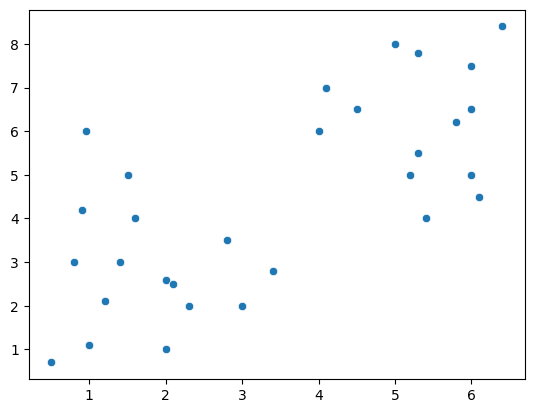

In [11]:
sns.scatterplot(x = x1_train, y = x2_train)

Now we'd like to find the **decision boundary** for this problem, so that we can categorize each point as either belonging to the right or left cluster.

Let's start by assuming that the decision boundary is a **linear function**. 

### Gradient Descent
Let's define the cost function, for $m$ training examples, as: 
$$
J(\Theta) = -\frac{1}{m}\sum_{i=0}^{m-1}(y^{(i)}log( h_{\Theta}(x^{(i)})) + (1-y^{(i)})log(1 - h_{\Theta}(x^{(i)})))
$$
Let's also define the Gradient as of J over $\Theta$ as: 
$$
\frac{\delta(J(\Theta))}{\delta(\Theta)} = \frac{1}{m}X^{T}(h_{\Theta}(X) - y)
$$

In [12]:
def J(Theta, X, Y, m):
    
    E = 0;
    for i in range(0, m):
        E += np.matmul(Y[:, i], np.log(h(X[:, i], Theta))) + (1 - Y[:, i]) * np.log(1.00000001 - h(X[:, i], Theta))
        
    return -E / m

Note the `1.00000001` in `np.log(1.00000001 - h(X[:, i], Theta)`. <br>
That is very explicit and needed because of the floating point precision in numbers: by running Gradient Descent with `1.0` instead of `1.00000001`, the lacking of deep precision (up until the 26th decimal) meant that often `h(X[:, i], Theta)` went to being rounded to 1, while it was, instead something like 0.99999999999999999999999999999998, which makes a big difference for the logarithm.<br>
That means that the log became $log(0)$ which broke the formula. 

In [13]:
def grad(Theta, X, y, m): 
    
    return (1/m) * np.matmul(X, np.transpose(h(X, Theta) - Y))
    

In [14]:
def run_gradient_descent(X, Y, Theta, num_iterations): 
    
    m = len(np.transpose(Y))
    alpha = 0.3

    iterations = num_iterations

    er = np.zeros((2, iterations))
    for i in range(0, iterations): 

        calculated_grad = grad(Theta, X, Y, m)

        Theta = Theta - alpha * calculated_grad

        e = J(Theta, X, Y, m)
        er[0, i] = i
        er[1, i] = e

    return (er, Theta)

The matrix `er` is $\mathbb{R}^{2, i}$ where $i$ is the number of iterations. It basically collects the error for each iteration, so that I can plot the Error function over time (iterations).

In [15]:
Theta = np.array([5, 5, 5]).reshape(3, 1)

iterations = (100, 200, 300, 400)

best_Theta = Theta
best_error = 100000
error_per_iteration = []

for it in iterations: 
    
    er, Theta_it = run_gradient_descent(X, Y, Theta, it)
    
    print(f"Gradient Descent with {it} iterations: Error went from {er[1, 0]} to {er[1, it-1]}")
    
    if (er[1, it-1] < best_error):
        best_Theta = Theta_it
        best_error = er[1, it - 1]
        error_per_iteration = er

C:\Users\nimat\AppData\Local\Temp\ipykernel_25748\1486687062.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  er[1, i] = e


Gradient Descent with 100 iterations: Error went from 9.40356926443779 to 0.3257705832870736
Gradient Descent with 200 iterations: Error went from 9.40356926443779 to 0.16185786903720614
Gradient Descent with 300 iterations: Error went from 9.40356926443779 to 0.11089477026824006
Gradient Descent with 400 iterations: Error went from 9.40356926443779 to 0.08574545666001596


Now let's plot the Error over the Iterations for the best accuracy (in the case above, it's obtained for 400 iterations). 

<Axes: >

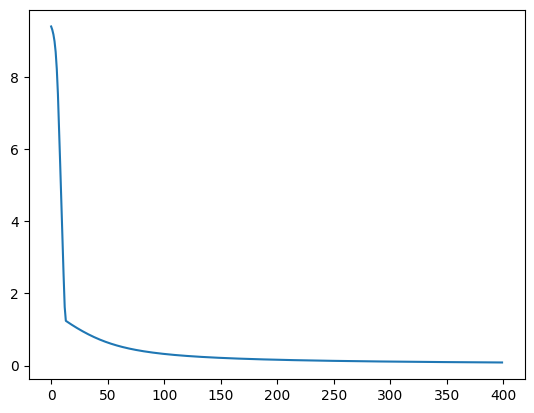

In [16]:
sns.lineplot(x = error_per_iteration[0], y = error_per_iteration[1])

In [17]:
best_Theta

array([[-5.94156022],
       [ 1.27161482],
       [ 0.37489884]])

In [18]:
x_bound = np.linspace(0,6)
y_bound = - ( (x_bound * best_Theta[1, 0] + best_Theta[0, 0]) / best_Theta[2, 0] )

## The Result! 
A completely fine-working Decision Boundary!!! 

<Axes: >

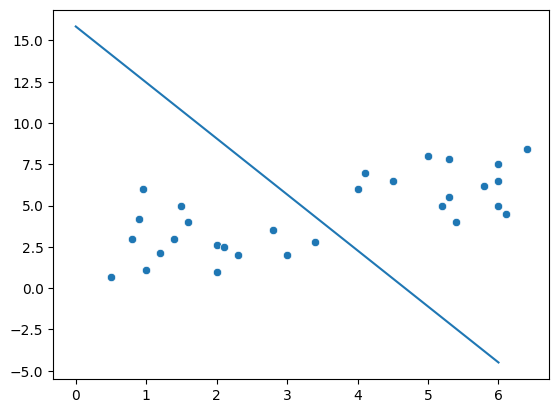

In [19]:
sns.lineplot(x = x_bound, y = y_bound)
sns.scatterplot(x = x1_train, y = x2_train)

Et voilà!! <br>
The Decision Boundary has been found! 

---
### Notes

What is **REALLY IMPORTANT** is that by running "only" 100 iterations, I was getting a **completely wrong and discouraging** result!
Let's plot that result.

In [508]:
T = np.array([5, 5, 5]).reshape(3, 1)
er, Theta_bad = run_gradient_descent(X, Y, T, 100)

print(f"Gradient Descent with {100} iterations: Error went from {er[1, 0]} to {er[1, 99]}")

/tmp/ipykernel_5167/2370741798.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return 1 / (1.0 + np.exp(-1 * z(X, Theta)))


Gradient Descent with 100 iterations: Error went from 9.40356926443779 to 0.3257705832870736


Turns out that `0.32577` is a **pretty big error**!!<br>
Look at the resulting Decision Boundary! 

In [509]:
x_bound_wrong = np.linspace(0,6)
y_bound_wrong = - ( (x_bound_wrong * Theta_bad[1, 0] + Theta_bad[0, 0]) / Theta_bad[2, 0] )

<AxesSubplot:>

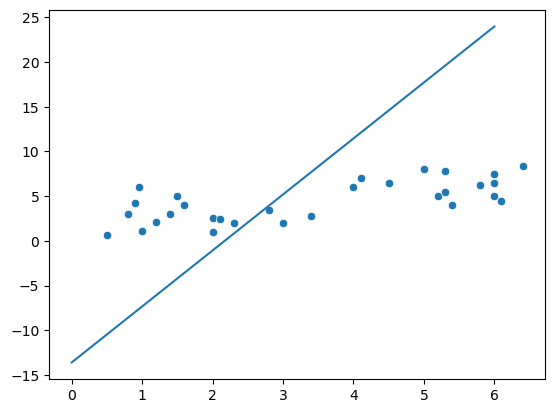

In [510]:
sns.lineplot(x = x_bound_wrong, y = y_bound_wrong)
sns.scatterplot(x = x1_train, y = x2_train)

That is terrible!! It's an incredible difference if you compare it with "just" 200, 300 or 400 iterations! 